In [2]:
import pandas as pd
import datetime
import seaborn as sns
import numpy as np

In [10]:
parcels = pd.read_csv('Parcel_Report_June_23_22_10_31_23.csv')
parcels = parcels[parcels['Mail Room Description 3'] == 'North Campus Service Center']
parcels_withIssueDate = parcels[parcels['Issue Date'].notnull()]

parcels_withIssueDate[['Issue Date Only', 'Issue Time Only']] = (parcels_withIssueDate['Issue Date'].str.split(" ", n=1, expand=True)) 
parcels_withIssueDate[['Receipt Date Only', 'Receipt Time Only']] = (parcels_withIssueDate['Receipt Date'].str.split(" ", n=1, expand=True)) 

C:\Users\mkolb\AppData\Local\Temp\ipykernel_3452\3120406117.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parcels_withIssueDate[['Issue Date Only', 'Issue Time Only']] = (parcels_withIssueDate['Issue Date'].str.split(" ", n=1, expand=True))
C:\Users\mkolb\AppData\Local\Temp\ipykernel_3452\3120406117.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parcels_withIssueDate[['Issue Date Only', 'Issue Time Only']] = (parcels_withIssueDate['Issue Date'].str.split(" ", n=1, expand=True))
C:\Users\mkolb\App

In [11]:
parcels_withIssueDate = parcels_withIssueDate.drop(columns=['Issue Time Only', 'Receipt Time Only'])
# parcels_withIssueDate['Issue Date Only'].to_list()
# pd.to_datetime(parcels_withIssueDate['Issue Date Only'], format='%m/%d/%Y')
parcels_withIssueDate['Issue Date Only']= pd.to_datetime(parcels_withIssueDate['Issue Date Only'])
parcels_withIssueDate['Receipt Date Only']= pd.to_datetime(parcels_withIssueDate['Receipt Date Only'])

# remove all packages prior to Aug
parcels_withIssueDate = parcels_withIssueDate[parcels_withIssueDate['Receipt Date Only'] > datetime.datetime(2023, 7, 31)]

C:\Users\mkolb\AppData\Local\Temp\ipykernel_3452\3081506634.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  parcels_withIssueDate['Issue Date Only']= pd.to_datetime(parcels_withIssueDate['Issue Date Only'])
C:\Users\mkolb\AppData\Local\Temp\ipykernel_3452\3081506634.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  parcels_withIssueDate['Receipt Date Only']= pd.to_datetime(parcels_withIssueDate['Receipt Date Only'])


In [12]:
parcels_withIssueDate['days_until_pickup'] = parcels_withIssueDate['Issue Date Only'] - parcels_withIssueDate['Receipt Date Only']

In [13]:
days_until_pickup_counts = parcels_withIssueDate['days_until_pickup'].value_counts()
days_until_pickup_counts.index = days_until_pickup_counts.index.astype('timedelta64[s]').astype('int64')/86400

In [14]:
days_until_pickup_counts = days_until_pickup_counts/days_until_pickup_counts.sum()
days_until_pickup_counts

days_until_pickup
0.0     0.399835
1.0     0.287816
2.0     0.118745
3.0     0.065164
4.0     0.041314
5.0     0.026674
6.0     0.017788
7.0     0.010972
8.0     0.006187
9.0     0.004299
11.0    0.002842
10.0    0.002734
12.0    0.002212
13.0    0.001871
14.0    0.001547
15.0    0.001079
16.0    0.000935
20.0    0.000827
18.0    0.000719
17.0    0.000683
19.0    0.000612
23.0    0.000414
22.0    0.000414
25.0    0.000414
21.0    0.000378
26.0    0.000306
35.0    0.000306
31.0    0.000252
27.0    0.000252
33.0    0.000234
28.0    0.000234
24.0    0.000234
30.0    0.000198
29.0    0.000180
32.0    0.000162
34.0    0.000108
38.0    0.000090
36.0    0.000090
42.0    0.000072
46.0    0.000072
41.0    0.000072
37.0    0.000072
43.0    0.000054
60.0    0.000054
64.0    0.000054
45.0    0.000054
54.0    0.000054
47.0    0.000036
48.0    0.000036
70.0    0.000036
73.0    0.000036
40.0    0.000036
63.0    0.000018
67.0    0.000018
58.0    0.000018
57.0    0.000018
39.0    0.000018
53.0    0.000

In [15]:
days_until_pickup_counts.to_csv("pickup_dist.csv")

y= 0.4152799363165631 * e^( -0.5422029594704607 *x) + 0.00012958474219183427


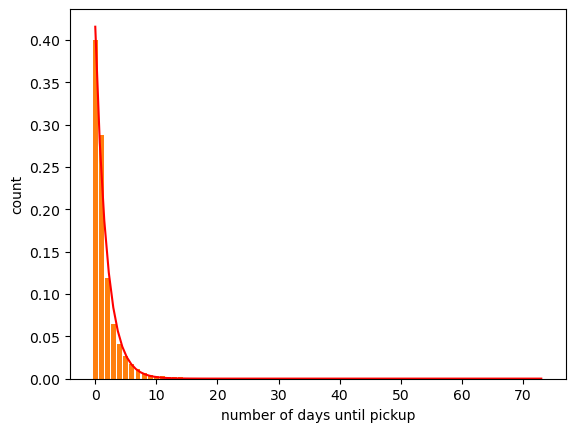

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x = days_until_pickup_counts.index
y = days_until_pickup_counts.values
ax.bar(x, y)
ax.set_xlabel('number of days until pickup')
ax.set_ylabel('count')


from scipy.optimize import curve_fit

def exponential_func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Fit the exponential function to the data
popt, pcov = curve_fit(exponential_func, x, y)

# Plot the bar chart
plt.bar(x, y, label='Data')

# Plot the exponential curve
x_fit = np.linspace(min(x), max(x), 100)  # Generate x values for the curve
plt.plot(x_fit, exponential_func(x_fit, *popt), color='red', label='Exponential Fit')

# Extract coefficients
a, b, c = popt

# Print coefficients
# print("Coefficient a:", a)
# print("Coefficient b:", b)
# print("Coefficient c:", c)
print("y=", a, "* e^(", -b, "*x) +", c)

In [17]:
parcels = pd.read_csv('Parcel_Report_June_23_22_10_31_23.csv')
parcels = parcels[parcels['Mail Room Description 3'] == 'North Campus Service Center']
parcels_withReceiptDate = parcels[parcels['Issue Date'].notnull()]
parcels_withReceiptDate[['Receipt Date Only', 'Receipt Time Only']] = (parcels_withReceiptDate['Receipt Date'].str.split(" ", n=1, expand=True))
parcels_withReceiptDate = parcels_withReceiptDate.drop(columns=['Receipt Time Only'])

parcels_withReceiptDate['Receipt Date Only']= pd.to_datetime(parcels_withReceiptDate['Receipt Date Only'])
parcels_withReceiptDate = parcels_withReceiptDate[parcels_withReceiptDate['Receipt Date Only'] > datetime.datetime(2023, 7, 31)]

C:\Users\mkolb\AppData\Local\Temp\ipykernel_3452\3084546888.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parcels_withReceiptDate[['Receipt Date Only', 'Receipt Time Only']] = (parcels_withReceiptDate['Receipt Date'].str.split(" ", n=1, expand=True))
C:\Users\mkolb\AppData\Local\Temp\ipykernel_3452\3084546888.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parcels_withReceiptDate[['Receipt Date Only', 'Receipt Time Only']] = (parcels_withReceiptDate['Receipt Date'].str.split(" ", n=1, expand=True)

In [18]:
parcels_withReceiptDate

,Parcel Type Description 1,Shipping Type Description,Parcel Status Description 2,Issue Date,Receipt Date,Entry Parcel ID,Processor NetID,Mail Room Description 3,Description 4,Receipt Date Only
4753,Package,USPS,Issued,8/2/23 12:05,8/1/23 8:23,1865697,NaN,North Campus Service Center,pr-br,2023-08-01
4754,Package,USPS,Issued,8/2/23 12:05,8/1/23 8:26,1865698,NaN,North Campus Service Center,br,2023-08-01
4755,Package,USPS,Issued,8/2/23 12:05,8/1/23 8:28,1865699,NaN,North Campus Service Center,br,2023-08-01
4756,Package,(Please Select Type),Issued,8/2/23 12:05,8/1/23 8:29,1865700,NaN,North Campus Service Center,br,2023-08-01
4757,(Select from List),USPS,Issued,8/2/23 12:05,8/1/23 8:32,1865701,NaN,North Campus Service Center,br,2023-08-01
...,...,...,...,...,...,...,...,...,...,...
94957,Envelope,USPS,Issued,10/31/23 21:42,10/31/23 20:35,1956090,NaN,North Campus Service Center,e,2023-10-31
94961,Envelope,USPS,Issued,10/31/23 20:46,10/31/23 20:38,1956093,NaN,North Campus Service Center,e,2023-10-31
94963,Envelope,USPS,Issued,10/31/23 21:06,10/31/23 20:39,1956094,NaN,North Campus Service Center,e,2023-10-31
94968,Envelope,Misc. Shipper,Issued,10/31/23 21:16,10/31/23 20:43,1956100,NaN,North Campus Service Center,e,2023-10-31


In [19]:
arrival_counts = parcels_withReceiptDate['Receipt Date Only'].value_counts()
arrival_counts = arrival_counts.sort_index()
arrival_counts_edited = arrival_counts.reset_index()
arrival_counts_edited = arrival_counts_edited.drop(columns=['Receipt Date Only'])

poly1d([-1.07225126e-05,  2.39449219e-03, -1.82826068e-01,  5.16182726e+00,
       -2.11213891e+01,  7.56298424e+01])

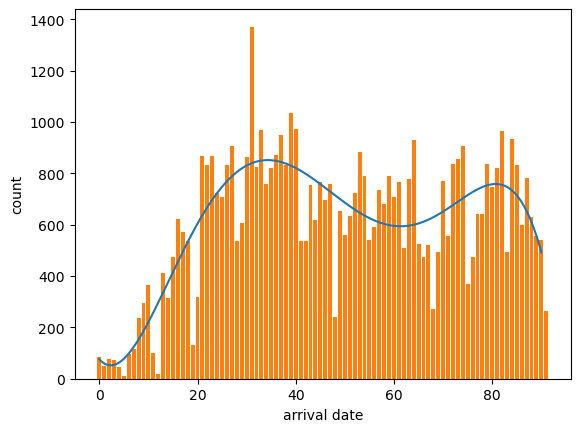

In [20]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


fig, ax = plt.subplots()
x = arrival_counts_edited.index
y = np.concatenate(arrival_counts_edited.values)
ax.bar(x, y)
ax.set_xlabel('arrival date')
ax.set_ylabel('count')



# Plot the bar chart
plt.bar(x, y, label='Data')

model = np.poly1d(np.polyfit(x, y, 5))
polyline = np.linspace(0, 90, 1500)
plt.plot(polyline, model(polyline))

model

poly1d([ 5.79972387e-03, -1.02398354e+00,  5.41198810e+01, -1.20694985e+02])

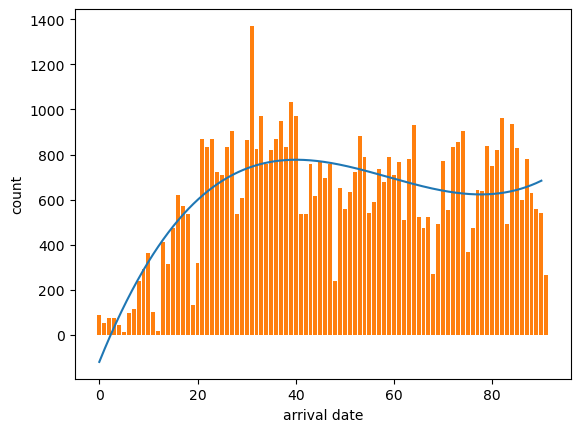

In [21]:
fig, ax = plt.subplots()
x = arrival_counts_edited.index
y = np.concatenate(arrival_counts_edited.values)
ax.bar(x, y)
ax.set_xlabel('arrival date')
ax.set_ylabel('count')



# Plot the bar chart
plt.bar(x, y, label='Data')

model = np.poly1d(np.polyfit(x, y, 3))
polyline = np.linspace(0, 90, 1500)
plt.plot(polyline, model(polyline))

model

In [22]:
parcels['Description 4'].value_counts()

Description 4
e                             10940
E                              9804
PR                             8413
s                              5163
pr                             5101
                              ...  
PR-XL                             1
e-xl                              1
pr- big                           1
pr-tube                           1
hbh-floor -brown box #0713        1
Name: count, Length: 438, dtype: int64

In [25]:
arrival_counts_edited.to_csv('arrival_counts_edited.csv')

In [26]:
arrival_counts_edited

,count
0,86
1,50
2,75
3,73
4,45
...,...
87,780
88,630
89,557
90,540


## returned package distribution

In [10]:
parcels = pd.read_csv('Parcel_Report_June_23_22_10_31_23.csv')
parcels = parcels[parcels['Mail Room Description 3'] == 'North Campus Service Center']
parcels[['Receipt Date Only', 'Receipt Time Only']] = (parcels['Receipt Date'].str.split(" ", n=1, expand=True)) 
parcels['Receipt Date Only']= pd.to_datetime(parcels['Receipt Date Only'])
parcels = parcels[parcels['Receipt Date Only'] > datetime.datetime(2023, 7, 31)]

C:\Users\mkolb\AppData\Local\Temp\ipykernel_31632\2784122060.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  parcels['Receipt Date Only']= pd.to_datetime(parcels['Receipt Date Only'])


In [13]:
returned_packages = parcels[parcels['Parcel Status Description 2']=='Returned']

In [15]:
import matplotlib.pyplot as plt

In [37]:
grouped_returned_packages = returned_packages[['Receipt Date Only','Parcel Status Description 2']].groupby('Receipt Date Only').count()

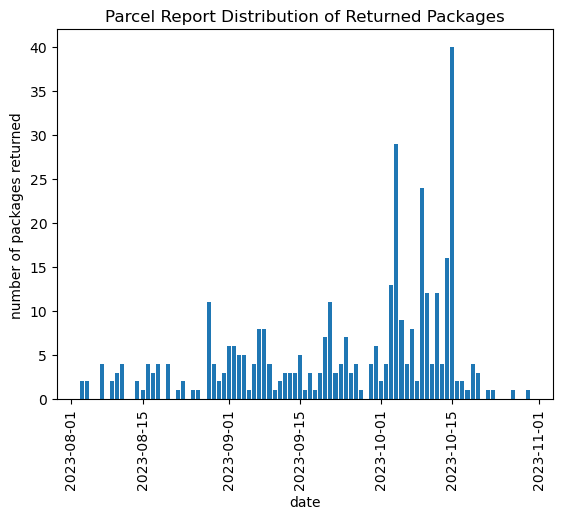

In [40]:
plt.bar(grouped_returned_packages.index, grouped_returned_packages['Parcel Status Description 2'])
plt.xticks(rotation=90)
plt.xlabel("date")
plt.ylabel("number of packages returned")
plt.title("Parcel Report Distribution of Returned Packages")
plt.show()